Engy-5310: Computational Continuum Transport Phenomena Fall 2021 UMass Lowell; Prof. V. F. de Almeida **05Oct21**

# Homework 05 (02Nov21)

$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

### Name: `Shubojit Banerjee & Julián Barra`

### Rubric for each assignment: 

|       Context               |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file in the Blackboard submission portal as: 
   </span> 
   
   **lastname-firstname-labwork-xx.ipynb**

---
## Table of Assignments<a id="toa"></a>
* [Assignment 1 (95 pts)](#a1) Function approximation with Lagrange finite element basis functions.
 - [1.1)](#a11)(10 pts) Problem statement.
 - [1.2)](#a12)(15 pts) Manufacture a solution.
 - [1.3)](#a13)(20 pts) Solution of manufactured problem with less than 1% exact error.
 - [1.4)](#a14)(20 pts) Solve original problem with the same method.
 - [1.5)](#a14)(20 pts) Demonstrate solution is mesh converged.
 - [1.6)](#a14)(10 pts) Provide total balance relative error.
* [Assignment 2 (5 pts)](#a2) .
---

## <span style="color:blue">[Assignment 1 (95 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">[1.1)](#toa)(10 pts) State your Poisson mathematical problem.
</span><a id="a11"></a>

The problem we want to tackle as a project is the thermal modeling of the bricks of the FIRES project, used for thermal energy storage. The problem we want to tackle is both the modeling of the system in general and to see if it will present thermal runway. The problem can be set generically as this:

\begin{align*}
 -\bigl(-k(x)\, u'\bigr)'(x) + f(x) &= 0 \quad\quad \forall \quad\quad x\in [a,b], \\
 u(a) &= u_a, \\
 u(b) &= u_b.
\end{align*}

In our heat conduction problem, the diffusion term will be the same as this original statement, and given by Fourier's law:

\begin{align*}
-\frac{\partial }{\partial x}\left (-k \frac{\partial T}{\partial x} \right )
\end{align*}

Our version of the problem has a constant heat generation term and no source slope. The generation of heat corresponds to the heating of the resistor material via the Joule effect. The equation for the heat density will be given as follows:

\begin{align*}
f\left (x \right )=\dot{e}_{gen}=\frac{AV^{2}}{  L_{char} \rho }
\end{align*}

For the values of the several variables to be input into the equation, we will use some of them found as the values for Aluminum oxide, which is the material the bricks are going to be made of. Note thathaving the exact value of every element in the equation isn't really important. Hence why we exaggerate the value of the voltage to obtain a solution with higher values of temperature. In the case of the electrical resistivity, we use the value found at ambient temperature.

\begin{align*}
\rho =4085,7 \; \left [ \frac{W}{mK} \right ]
\end{align*}

\begin{align*}
A =0,05 \; \left [ m^{2} \right ]
\end{align*}

\begin{align*}
L_{char} =0,05 \; \left [ m \right ]
\end{align*}

\begin{align*}
V =300 \; \left [ kV \right ]
\end{align*}

With regards to the value of heat conduction, we will try to make an approximation of it as dependent on the value of temperature. We can't know the temperature profile a priori (that is what we're trying to solve for in the first place), so we will build a linear heat conductivity equation, with the values at the extremes of the heat conductivity curve being the values for aluminum oxide at the temperatures at the boundaries of the domain, which is something we will explain next. These will be the values of the heat conductivity:

\begin{align*}
k(20)=31,93 \; \left [ \frac{W}{mK} \right ]
\end{align*}

\begin{align*}
k(40)=29,94 \; \left [ \frac{W}{mK} \right ]
\end{align*}


Boundary conditions will be given by the fact that the air will cool the bricks at both extremes of the domain, (assuming the brick is an uniform geometry), and one side will have a small temperature difference with the other to introduce a perturbation in the system to see if the system ends up in disiquilibrium or not. A reasonable first approximation is to assume the temperature at the borders of the domain (As we will explain later, we're modeling the heat along one of the walls of the brick) equals the temperature of the inlet air. We want to introduce a little disturbance so the system isn't perfectly symmetrical, however, because we want to know if the change of thermal conductivity with temperature might cause some level of thermal runway. We will fix one of the temperatures of the domain to 20°C higher than the temperature of the inlet air, then.

\begin{align*}
T_{a}=20\; [°C]
\end{align*}

\begin{align*}
T_{a}=40\; [°C]
\end{align*}

The domain itself is hard to define. Since there is not so much as boundaries in which fixed temperatures are defined but rather the air cools by entering in the channels of the bricks. The temperature, then, will be calculated in the thick walls between each air channel. The thichkness of these channels is 5 cm, so we will define a domain such that a is 0 and b is 0.05 m.

\begin{align*}
x\in [0,0.05]
\end{align*}

### <span style="color:blue">[1.2)](#toa)(15 pts) Manufacture a solution. Explain.
</span><a id="a12"></a>

We first import all libraries necessary for our work.

In [1]:
'''Generate the target function f'''
import matplotlib.pyplot as plt
import math as m
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import quad

We then procceed to manufacture a solution and to use the code on that to find out if we can obtain it back from the problem. That way we can test our algorithm, to see if it works.

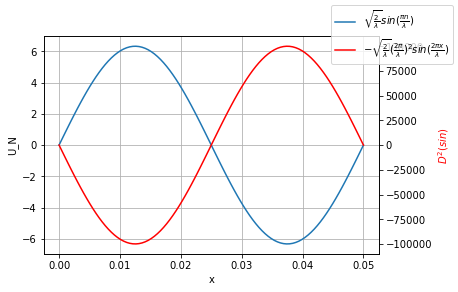

In [2]:
'''Rayleigh Ritz Method with Lagrange FE Basis Functions'''
x_min=0
x_max=0.05

degree = 2  #Degree of the lagrange polinomials used
n_elem = 20 #Number of elements used

lamda=x_max-x_min
def trigonometric_sol(x,n,func='sin'):
    if func=='sin':
        u_n=np.sqrt(2/lamda)*np.sin(np.pi*x*n/lamda)
        u_n_deriv=-np.sqrt(2/lamda)*((np.pi*n/lamda)**2)*np.sin(np.pi*x*n/lamda)
    return u_n,u_n_deriv

x_pts=np.linspace(x_min,x_max,100)
u_n,u_n_dderiv=trigonometric_sol(x_pts,2)
fig, ax1 = plt.subplots()
plt.grid()
ax2 = ax1.twinx()
ax1.plot(x_pts,u_n,label=r'$\sqrt{\frac{2}{\lambda}}sin(\frac{\pi n}{\lambda})$')
ax2.plot(x_pts,u_n_dderiv,label=r'$-\sqrt{\frac{2}{\lambda}}(\frac{2\pi}{\lambda})^2sin(\frac{2\pi x }{\lambda})$',color='Red')
ax1.set_xlabel('x')
ax1.set_ylabel('U_N')
ax2.set_ylabel(r'$D^2(sin)$',color='red')
#fig.set_size_inches(15,10)
fig.legend()

#plt.savefig('viscosity_acf_700k.png',dpi=300)
plt.show()

### <span style="color:blue">[1.3)](#toa)(20 pts) Solve your problem with the corresponding manufactured source using the Rayleigh-Ritz method with FEM Lagrange basis functions. Provide an approximate solution with relative $L^2$ norm exact error of 1% or less. Plot the solution and its flux. Provide the values of the solution at the boundaries and the corresponding values of the normal fluxes. Explain.
</span><a id="a13"></a>

In [3]:
Cond_shape_pts = [(0,1),(10,1)]
Cond=np.array(Cond_shape_pts)

f_cond=1

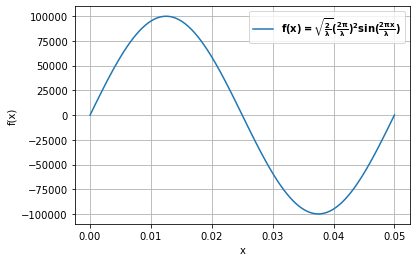

In [4]:
'''Source bias'''

def f_sb(x):
    u_n_deriv=np.sqrt(2/lamda)*((np.pi*2/lamda)**2)*np.sin(np.pi*x*2/lamda)
    return u_n_deriv

u_n_deriv=f_sb(x_pts)
plt.plot(x_pts,u_n_deriv,label=r'$\bf{f}(x)=\sqrt{\frac{2}{\lambda}}(\frac{2\pi}{\lambda})^2sin(\frac{2\pi x }{\lambda})$')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

Having this, we proceed to define the functions to partition the domain and also obtain the required basis functions.

In [5]:
'''Domain partition'''
def get_domain_partition(degree, n_elem, x_min, x_max, bc_x_min='essential', bc_x_max='essential'):
    #assert degree == 1
    # Local node numbering on parent domain
    # --0--------------1---->
    #  -1      0      +1    zetta
    gnodes_x = np.linspace(x_min, x_max, n_elem*degree+1, dtype=np.float64)
    patches = list()
    local_to_global_node_id_map = list()
    for e in range(n_elem):
        gnode_id_1 = degree*e   #left
        gnode_id_2 = degree*e+1 #center
        gnode_id_3 = degree*e+2 #right
        x1 = gnodes_x[gnode_id_1]
        x2 = gnodes_x[gnode_id_2]
        x3 = gnodes_x[gnode_id_3]
        # Local node id:  0   1
        patches.append((x1, x2, x3))
        # Local node id:                        0           2             1
        local_to_global_node_id_map.append([gnode_id_1, gnode_id_2,  gnode_id_3])
    if bc_x_min == 'essential':
        local_to_global_node_id_map[0][0] = -1
    if bc_x_max == 'essential':
        local_to_global_node_id_map[-1][-1] = -1
    return (patches, gnodes_x, local_to_global_node_id_map)

In [6]:
'''Parent mapping'''
def get_parent_mapping():
    # zetta in [-1,1]
    parent_mapping = lambda zetta, x_e_bar, h_e: x_e_bar + h_e/2*zetta # compute x
    parent_mapping_prime = lambda h_e: h_e/2                           # compute mapping derivative wrt zetta
    # x in Omega_e
    inverse_parent_mapping = lambda x, x_e_bar, h_e: (x - x_e_bar)*2/h_e # compute zetta
    return (parent_mapping, parent_mapping_prime, inverse_parent_mapping)

In [7]:
'''The basis functions'''
def get_parent_basis_functions():
    parent_basis_func_list = list()
    parent_basis_func_prime_list = list()
    parent_basis_func_list.append(lambda zetta: (zetta**2-zetta)/2)  # left
    parent_basis_func_list.append(lambda zetta: -(zetta**2-1))  # middle
    parent_basis_func_list.append(lambda zetta:  (zetta**2+zetta)/2)  # right
    parent_basis_func_prime_list.append(lambda zetta: (2*zetta-1)/2) # left
    parent_basis_func_prime_list.append(lambda zetta: -2*zetta) # middle
    parent_basis_func_prime_list.append(lambda zetta:  (2*zetta+1)/2) # right
    return (parent_basis_func_list, parent_basis_func_prime_list)

In [8]:
'''Again the function for the obtaining of the basis functions'''
def global_basis_function(i, x, domain_partition, parent_mapping, parent_basis_functions):
  
    try:
        len(x)
    except TypeError:
        x = np.array([x])
  
    if not isinstance(x, np.ndarray):
       assert isinstance(x, list) or isinstance(x, tuple)
       x = np.array(x)
  
    phi_i_x = np.copy(x) * 0.0 # initialization
    phi_prime_i_x = np.copy(x) * 0.0 # initialization
        
    patches = domain_partition[0]
    local_to_global_node_id_map = domain_partition[2]
    inverse_parent_mapping = parent_mapping[2]
    
    parent_basis_func_list = parent_basis_functions[0]
    parent_basis_func_prime_list = parent_basis_functions[1]
  
    # expensive reverse lookup
    for j, x_j in enumerate(x):
        for e, nodes_x in enumerate(patches):
            if nodes_x[0] <= x_j <= nodes_x[-1]:
                n_lnodes = len(nodes_x)
                for I in range(n_lnodes):
                    if local_to_global_node_id_map[e][I] == i:
                        x_e_bar = (nodes_x[0] + nodes_x[-1])/2
                        h_e = nodes_x[-1] - nodes_x[0]
                        zetta = inverse_parent_mapping(x_j, x_e_bar, h_e)
                        phi_i_x[j] = parent_basis_func_list[I](zetta)
                        phi_prime_i_x[j] = parent_basis_func_prime_list[I](zetta)
                break
    return [phi_i_x, phi_prime_i_x]

In [9]:
'''All global basis functions'''
def get_global_basis_functions(domain_partition, parent_mapping, parent_basis_functions, global_basis_function):
    
    basis_func_list = list()
    basis_func_prime_list = list()
    n_gnodes = domain_partition[1].size
    local_to_global_node_id_map = domain_partition[2]
    phi_i = lambda i, x: global_basis_function(i,x, domain_partition,parent_mapping,parent_basis_functions)[0]
    phi_prime_i = lambda i, x: global_basis_function(i,x, domain_partition,parent_mapping,parent_basis_functions)[1]

    visited = [False]*n_gnodes
    for e in range(n_elem):
        for I in range(len(local_to_global_node_id_map[e])):
            gnode_id = local_to_global_node_id_map[e][I]
            if gnode_id >= 0 and not visited[gnode_id]:
                      basis_func_list.append(lambda x, i=gnode_id: phi_i(i,x))
                      basis_func_prime_list.append(lambda x, i=gnode_id: phi_prime_i(i,x))
                        
                      visited[gnode_id] = True
  
    assert len(basis_func_list) >= 1, 'There are no basis functions to build.'
    return [basis_func_list, basis_func_prime_list]

# It is implied here the boundary conditions are of type: flux
domain_partition = get_domain_partition(degree, n_elem, x_min, x_max)
parent_mapping = get_parent_mapping()
parent_basis_functions = get_parent_basis_functions()

phi_list = get_global_basis_functions(domain_partition, parent_mapping, parent_basis_functions, global_basis_function)[0]
phi_prime_list = get_global_basis_functions(domain_partition, parent_mapping, parent_basis_functions, global_basis_function)[1]

In [10]:
'''Pedagogical inner product'''
def inner_product(u, v, patches):
    integrand = lambda x: u(x) * v(x)          
    inner_product = 0.0
    for nodes_x in patches:
        (inner_product_e, _) = quad(integrand, nodes_x[0], nodes_x[-1])
        inner_product += inner_product_e
        
    return inner_product

In [11]:
#Building of the dead matrix
A_mtrx = np.zeros((len(phi_list), len(phi_list)), dtype=np.float64)
patches = domain_partition[0]
for i in range(len(phi_list)):
    for j in range(len(phi_list)):
        
        phi_i=phi_list[i]
        phi_j=phi_list[j]
        
        phi_prime_i=phi_prime_list[i]
        phi_prime_j=phi_prime_list[j]
        
        h_e=(x_max-x_min)/n_elem
        
        d_x_phi_prime_j = lambda x: f_cond * ((2/h_e)*phi_prime_j(x))
        prima = lambda x: phi_prime_i(x)*(2/h_e)

        A_mtrx[i,j] = inner_product(prima, d_x_phi_prime_j, patches)

In [12]:
'''Build load vector'''
#The load vector
b_vec = np.zeros(len(phi_list), dtype=np.float64)
patches = domain_partition[0]
for i, phi_i in enumerate(phi_list):
    b_vec[i] = inner_product(f_sb, phi_i, patches)#+u_a*phi_i(x_min)+u_b*phi_i(x_max)
    #print(patches)

'''Compute optimal coefficient vector'''
c_star_vec_trial = np.linalg.solve(A_mtrx, b_vec)

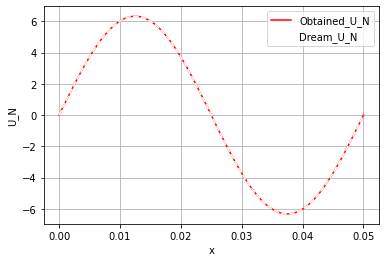

The value of the function at the leftmost end of the domain is: 0.00 [°C].
The value of the function at the rightmost end of the domain is: 0.00 [°C].
q_na computed =  [-1.00154929]
q_nb computed =  [-1.00154929]


In [13]:
'''Plot comparison of f and g_best_vec'''
def u_star(x):
    g_x=0
    for (j,phi_i) in enumerate(phi_list):
        g_x=g_x+(c_star_vec_trial[j])*phi_i(x)
    return g_x
g_x=u_star(x_pts)


def u_star_prime(x):
    g_x=0
    for (j,phi_prime_i) in enumerate(phi_prime_list):
        g_x=g_x+(c_star_vec_trial[j])*phi_prime_i(x)
    return g_x

plt.figure()
plt.plot(x_pts,g_x,label='Obtained_U_N',color='red')
#plt.plot(x_pts,sol(x_pts))
plt.plot(x_pts,u_n,label='Dream_U_N',linestyle='--',color='white')
plt.legend()
plt.xlabel("x")
plt.ylabel("U_N")
plt.grid()
plt.show()

print('The value of the function at the leftmost end of the domain is: %4.2f [°C].'%u_star(x_min))
print('The value of the function at the rightmost end of the domain is: %4.2f [°C].'%u_star(x_max))


'''Flux at boundary'''
print('q_na computed = ', -f_cond*u_star_prime(x_min))
print('q_nb computed = ', -f_cond*u_star_prime(x_max))
#print('q_nb given    = ', q_nb)
#print('flux error [%]= ',(-f_cond(x_max)*g_prime(x_max) - q_nb)/q_nb*100)

In [14]:
'''L2 norm error'''
def f_integrand(x):
    f_x,_ = trigonometric_sol(np.array([x]),2)
    return f_x**2
f_integral = quad(f_integrand, x_min, x_max, limit=1000)
f_l2=np.sqrt(f_integral)

print('||f||_L2 =%10.6f'%f_l2[0])
print('quadrature error =%10.6e'%f_l2[1])

def g2_integrand(x):
    g_vec = u_star(np.array([x]))
    return g_vec**2

def f_minus_g_2_integrand(x):
    f_x,_ = trigonometric_sol(np.array([x]),2)
    g_vec = u_star(np.array([x]))
    return (f_x-g_vec)**2

f_minus_g_2_integral, error = quad(f_minus_g_2_integrand, x_min, x_max, limit=1000)
print('||f-g||_L2 =', m.sqrt(f_minus_g_2_integral))
print('quadrature error =', error)
r_err=(m.sqrt(f_minus_g_2_integral)/np.sqrt(f_integral)*100)
print('')
print('Relative error = %10.6f'%r_err[0],'%')

||f||_L2 =  1.000000
quadrature error =2.709214e-05
||f-g||_L2 = 0.00017811849901605616
quadrature error = 1.3309966294060635e-08

Relative error =   0.017812 %


### <span style="color:blue">[1.4)](#toa)(20 pts) Using the same FEM above, solve your problem as stated originally. Provide the corresponding results as in 1.3). Explain.
</span><a id="a14"></a>

The libraries are already imported. The next cell will define the minimum and maximum values of x for the domain, the degree of the polynomials used and the number of elements used in the Rayleigh-Ritz method we will use to obtain our solution.

In [15]:
'''Rayleigh Ritz Method with Lagrange FE Basis Functions'''
x_min=0
x_max=0.05

degree = 2  #Degree of the lagrange polinomials used
n_elem = 8 #Number of elements used

The next cell will define the thermal conductivity function, which we already mention is not a constant value, but one changing as a linear function aling the domain.

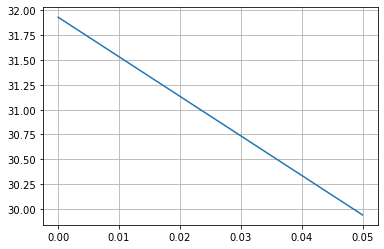

In [16]:
'''Thermal conductivity'''

Cond_shape_pts = [(0,31.93),(0.05,29.94)]
#Cond_shape_pts = [(0,37),(0.05,37)]
Cond=np.array(Cond_shape_pts)

f_cond=interp1d(Cond[:,0],Cond[:,1])

plt.figure()
plt.plot(np.linspace(0,0.05,200),f_cond(np.linspace(0,0.05,200)),label='Target Function')
plt.grid()
plt.show()

The next cell will define the source bias function, using the values we already mentioned in our introduction to the problem and assuming the value of electrical resistivity as a constant.

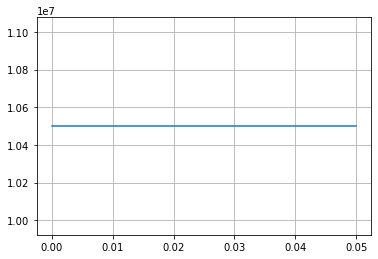

In [17]:
'''Source bias'''
roh=4085.7

#V=300000
#V=0
#L_char=0.05
#A=0.05*1

#Use of points to build the source bias function

#Source= 575117 T(x)+ 1,05E7

Source_shape_pts = [(0,1.05E7),(0.05,1.05E7)]
source=np.array(Source_shape_pts)

f_sourcebias=interp1d(source[:,0],source[:,1])

plt.figure()
plt.plot(np.linspace(0,0.05,200),f_sourcebias(np.linspace(0,0.05,200)),label='Target Function')
plt.grid()
plt.show()

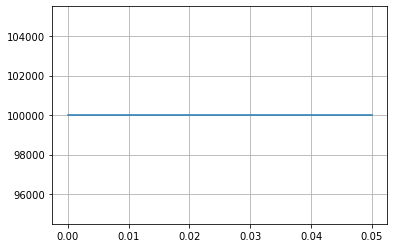

In [18]:
'''Source bias'''
S_Slope=100000

Slope_shape_pts = [(0,S_Slope),(0.05,S_Slope)]
slope=np.array(Slope_shape_pts)

f_slope=interp1d(slope[:,0],slope[:,1])

plt.figure()
plt.plot(np.linspace(0,0.05,200),f_slope(np.linspace(0,0.05,200)),label='Target Function')
plt.grid()
plt.show()

In the next cell, we will build the lift function, since we're trying to solve the problem using the Rayleigh-Ritz method with strongly enforced boundary conditions. The lift function doesn't have a constant value here, so we can't use the shortcut we used in our previous homework, where we assumed the derivative of the lift function to be 0. We will build both functions. The lift function is built as a linear function that interpolates the values of the temperatures at both extremes of the domain.

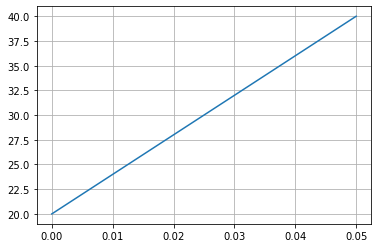

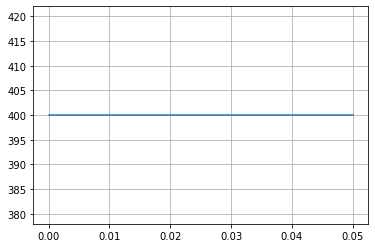

In [19]:
'''Building the lift function'''
u_a=20
u_b=40

Lift_shape_pts = [(0,u_a),(0.05,u_b)]
Lift=np.array(Lift_shape_pts)
f_lift=interp1d(Lift[:,0],Lift[:,1])

f_prime=((u_b-u_a)/(x_max-x_min))
Lift_prime_shape_pts = [(0,f_prime),(0.05,f_prime)]
Lift_prime=np.array(Lift_prime_shape_pts)
f_lift_prime=interp1d(Lift_prime[:,0],Lift_prime[:,1])

plt.figure()
plt.plot(np.linspace(0,0.05,200),f_lift(np.linspace(0,0.05,200)))
plt.grid()
plt.show()

plt.figure()
plt.plot(np.linspace(0,0.05,200),f_lift_prime(np.linspace(0,0.05,200)))
plt.grid()
plt.show()

Everything has already been coded for in the section to find the manufactured solution, so here we will simply call the functions to do their job:

In [20]:
# It is implied here the boundary conditions are of type: flux
domain_partition = get_domain_partition(degree, n_elem, x_min, x_max)
parent_mapping = get_parent_mapping()
parent_basis_functions = get_parent_basis_functions()

phi_list = get_global_basis_functions(domain_partition, parent_mapping, parent_basis_functions, global_basis_function)[0]
phi_prime_list = get_global_basis_functions(domain_partition, parent_mapping, parent_basis_functions, global_basis_function)[1]

The next cell builds the A matrix.

In [21]:
#Building of the A matrix
A_mtrx = np.zeros((len(phi_list), len(phi_list)), dtype=np.float64)
patches = domain_partition[0]
for i in range(len(phi_list)):
    for j in range(len(phi_list)):
        
        phi_i=phi_list[i]
        phi_j=phi_list[j]
        
        phi_prime_i=phi_prime_list[i]
        phi_prime_j=phi_prime_list[j]
        
        h_e=(x_max-x_min)/n_elem
        
        d_x_phi_prime_j = lambda x: f_cond(x) * ((2/h_e)*phi_prime_j(x))
        
        prima = lambda x: phi_prime_i(x)*(2/h_e)
        
        A_mtrx[i,j] = inner_product(prima, d_x_phi_prime_j, patches)
        
        sloper = lambda x: phi_j(x)*f_slope(x)
        
        A_mtrx[i,j] -= inner_product(sloper, phi_i, patches)

This other cell builds the load vector and also does the necessary linear algebra to obtain the optimal coefficients vector.

In [22]:
'''Build load vector'''
#The load vector
b_vec = np.zeros(len(phi_list), dtype=np.float64)
patches = domain_partition[0]

for i in range(len(phi_list)):
    phi_i=phi_list[i]
    phi_prime_i=phi_prime_list[i]
    
    b_vec[i] = inner_product(f_sourcebias, phi_i, patches)
    
    first_term = lambda x: f_lift_prime(x)*f_cond(x)
    phi_prima_i = lambda x: phi_prime_i(x)*(2/h_e)
    
    b_vec[i] -= inner_product(first_term, phi_prima_i, patches)
    
    slopelift = lambda x: f_slope(x)*f_lift(x)
    
    b_vec[i] += inner_product(slopelift, phi_i, patches)

'''Compute optimal coefficient vector'''
c_star_vec = np.linalg.solve(A_mtrx, b_vec)

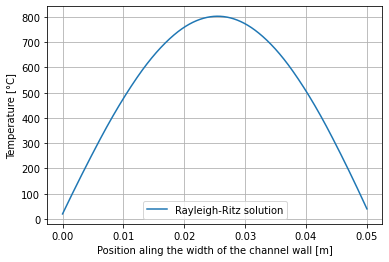

The value of the function at the leftmost end of the domain is: 20.00 [°C].
The value of the function at the rightmost end of the domain is: 40.00 [°C].


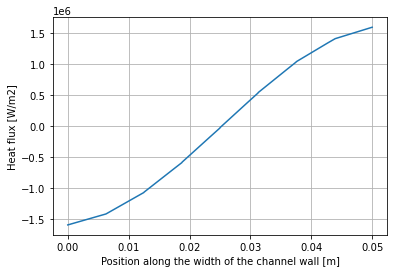

q_na computed =  [-1597813.33042015]
q_nb computed =  [1589806.50771907]


In [23]:
'''Plot comparison of f and g_best_vec'''
def u_star(x):
    g_x=f_lift(x)
    for (j,phi_i) in enumerate(phi_list):
        g_x=g_x+(c_star_vec[j])*phi_i(x)
    return g_x

def u_star_prime(x):
    g_x=0
    
    for j in range(len(phi_list)):
        g_x=g_x+(c_star_vec[j])*((2/h_e)*phi_prime_list[j](x))
    
    return g_x

'''Plot comparison of f and g_best_vec'''
def sol(x):
    u=30+(((f_sourcebias(x)/(2*f_cond)))*(x_max*x-x**2))
    return u

plt.figure()
plt.plot(np.linspace(x_min,x_max,2000),u_star(np.linspace(x_min,x_max,2000)),label='Rayleigh-Ritz solution')
#plt.plot(np.linspace(x_min,x_max,2000),sol(np.linspace(x_min,x_max,2000)),label='Analytic solution')
plt.xlabel("Position aling the width of the channel wall [m]")
plt.ylabel("Temperature [°C]")
plt.legend()
plt.grid()
plt.show()

print('The value of the function at the leftmost end of the domain is: %4.2f [°C].'%u_star(x_min))
print('The value of the function at the rightmost end of the domain is: %4.2f [°C].'%u_star(x_max))

#Analytical solution
#plt.figure()
#plt.plot(np.linspace(x_min,x_max,2000),sol(np.linspace(x_min,x_max,2000)))
#plt.xlabel("Position along the width of the channel wall [m]")
#plt.ylabel("Temperature [°C]")
#plt.grid()
#plt.show()


#Plotting the flux
plt.figure()
plt.plot(np.linspace(x_min,x_max,2000),-f_cond(np.linspace(x_min,x_max,2000))*u_star_prime((np.linspace(x_min,x_max,2000))))
plt.xlabel("Position along the width of the channel wall [m]")
plt.ylabel("Heat flux [W/m2]")
plt.grid()
plt.show()

#print(sol(np.linspace(x_min,x_max,2000)))

'''Flux at boundary'''
print('q_na computed = ', -f_cond(x_min)*u_star_prime(x_min))
print('q_nb computed = ', -f_cond(x_max)*u_star_prime(x_max))
#print('q_nb given    = ', q_nb)
#print('flux error [%]= ',(-f_cond(x_max)*g_prime(x_max) - q_nb)/q_nb*100)

#We store these variables for future use
flux_left=-f_cond(x_min)*u_star_prime(x_min)
flux_right=-f_cond(x_max)*u_star_prime(x_max)

sourcer = lambda x: (f_slope(x))*u_star(x)+f_sourcebias(x)

(Total_power, _)= quad(sourcer, x_min, x_max)

### <span style="color:blue">[1.5)](#toa)(20 pts) Demonstrate that your solution is mesh converged. Explain.
</span><a id="a15"></a>

We first integrate the area of the first solution over the entire domain. This we do as in the following cell:

In [24]:
'''Integral of the first solution'''
(Int_1,_)=quad(u_star, x_min, x_max) #Integral of the first solution

We will use this value later to show mesh convergence in our problem. After doing that, we calculate the solution for the n+5 number of elements, with n being the number of elements used to obtain the previous solution. The previous solution we obtained by using 10 elements to obtain the solution. The next solution we'll obtain by using 15 elements.

In [25]:
#Computation of a solution with one more element
n_elem=n_elem+5

h_e=(x_max-x_min)/n_elem

Next cell is the meat and potatoes, ending with obtaining the optimal coefficients vector.

In [26]:
domain_partition = get_domain_partition(degree, n_elem, x_min, x_max)
parent_mapping = get_parent_mapping()
parent_basis_functions = get_parent_basis_functions()

phi_list_2 = get_global_basis_functions(domain_partition, parent_mapping, parent_basis_functions, global_basis_function)[0]
phi_prime_list_2 = get_global_basis_functions(domain_partition, parent_mapping, parent_basis_functions, global_basis_function)[1]

def u_star_2(x):
    g_x=f_lift(x)
    for (j,phi_i) in enumerate(phi_list_2):
        g_x=g_x+(c_star_vec_2[j])*phi_i(x)
    return g_x

#Building of the A matrix
A_mtrx = np.zeros((len(phi_list_2), len(phi_list_2)), dtype=np.float64)
patches = domain_partition[0]

for i in range(len(phi_list_2)):
    for j in range(len(phi_list_2)):
        
        phi_i=phi_list_2[i]
        phi_j=phi_list_2[j]
        
        phi_prime_i=phi_prime_list_2[i]
        phi_prime_j=phi_prime_list_2[j]
        
        h_e=(x_max-x_min)/n_elem
        
        d_x_phi_prime_j = lambda x: f_cond(x) * ((2/h_e)*phi_prime_j(x))
        
        prima = lambda x: phi_prime_i(x)*(2/h_e)
        
        A_mtrx[i,j] = inner_product(prima, d_x_phi_prime_j, patches)
        
        sloper = lambda x: phi_j(x)*f_slope(x)
        
        A_mtrx[i,j] -= inner_product(sloper, phi_i, patches)
        
'''Build load vector'''
#The load vector
b_vec = np.zeros(len(phi_list_2), dtype=np.float64)
for i in range(len(phi_list_2)):
    phi_i=phi_list_2[i]
    phi_prime_i=phi_prime_list_2[i]
    
    b_vec[i] = inner_product(f_sourcebias, phi_i, patches)
    
    first_term = lambda x: f_lift_prime(x)*f_cond(x)
    phi_prima_i = lambda x: phi_prime_i(x)*(2/h_e)
    
    b_vec[i] -= inner_product(first_term, phi_prima_i, patches)
    
    slopelift = lambda x: f_slope(x)*f_lift(x)
    
    b_vec[i] += inner_product(slopelift, phi_i, patches)
    

'''Compute optimal coefficient vector'''
c_star_vec_2 = np.linalg.solve(A_mtrx, b_vec)

(Int_2,_)=quad(u_star_2, x_min, x_max) #Integral of the second solution

Rel_diff=((Int_2-Int_1)/Int_1)

print('The value of the relative difference between the two solutions is: %4E.'%Rel_diff)
print('The difference between the two solutions being so small, we can talk of the solution being mesh convergent')

The value of the relative difference between the two solutions is: 9.763350E-05.
The difference between the two solutions being so small, we can talk of the solution being mesh convergent


### <span style="color:blue">[1.6)](#toa)(10 pts) Provide the total energy balance relative error. Explain.
</span><a id="a16"></a>

We proceed to use now several variables we stored previously. The energy balance is just statement of the first law of thermodynamics: the energy that is generated in the system by the Joule efect must equal the amount of energy flux that is going out of the system. As such, we integrate the value of the source along the domain, obtaining then the total amount of energy flux entering the system and to this value we substract the heat fluxes at the ends of the domain, where they would flow to the air outside.

In [27]:
'''Total energy balance'''

print('Total energy balance relative error [%%] = %2.2f '%(100*(abs(flux_left)+ abs(flux_right) - Total_power)/(Total_power)))

Total energy balance relative error [%] = 0.99 


The energy balance relative error is very low, which speaks well of the accuracy of our solution.

## <span style="color:blue">[Assignment 2 (5 pts)](#toa)</span><a id="a3"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>

<span style="color:blue">**Answer:**</span>

At this point in the semester, most of our doubts regarding the content are with regards to the use of MOOSE. And the fact that we've had only two classes to discuss its use has left us with some doubts. Even the use of it to solve the same problem we solve in this notebook has us worried. What would be the steps to solve the problem qe have here to submit as the final project?

Some possible steps:

1.- After getting MOOSE to work, we need to feed it the .h5 files with the parameters of our problems as we need to solve it.

2.- Each of the different parameters that will be there will be defined as a class, some of the classes can be inputed different commands if one, for example, asks the boundary conditions to be of type flux or essential.

3.- The whole glossary of the details of how this works is complex, there is not much more to do aside from copying a lot of the code handed out in the notebooks. We can use that as a guide, recycling the code even if we don't understand it in depth.

4.- After the solution is calculated, one can print its values into a CSV file. From then on it isn't so hard, since CSV can be accesed by several Python libraries as Numpy or Pandas.

5.- After obtaining it in pandas, one can graph it side by side with the solution obtained here. Or maybe use some kind of norm or relative error calculation to obtain a measure of how different the solutions are.

Some of these steps are a bit vague, but at the same time, the problems will actually start to appear once we're there, trying to solve the problem.